# Predicting Wine Taste with Ridge Regression

In [1]:
from math import sqrt

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [2]:
# read data into iterable
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semi-colon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)


In [3]:
# divide attributes and labels into training and test sets
indices = range(len(x_list))

x_list_test = [x_list[i] for i in indices if i % 3 == 0]
x_list_train = [x_list[i] for i in indices if i % 3 != 0]

labels_test = [labels[i] for i in indices if i % 3 == 0]
labels_train = [labels[i] for i in indices if i % 3 != 0]

x_train = np.array(x_list_train)
y_train = np.array(labels_train)

x_test = np.array(x_list_test)
y_test = np.array(labels_test)

alpha_list = [0.1**i for i in [0, 1, 2, 3, 4, 5, 6]]

rms_error = []

for alph in alpha_list:
    wine_ridge_model = linear_model.Ridge(alpha=alph)
    wine_ridge_model.fit(x_train, y_train)
    rms_error.append(np.linalg.norm((y_test - wine_ridge_model.predict(x_test)), 2)/sqrt(len(y_test)))
    
print('RMS Error\t alpha\n')

for i in range(len(rms_error)):
    print(rms_error[i], '\t', alpha_list[i])


RMS Error	 alpha

0.659578817634 	 1.0
0.657861091881 	 0.1
0.657617214464 	 0.010000000000000002
0.657521648264 	 0.0010000000000000002
0.657419068011 	 0.00010000000000000002
0.657394162885 	 1.0000000000000003e-05
0.657391308716 	 1.0000000000000004e-06


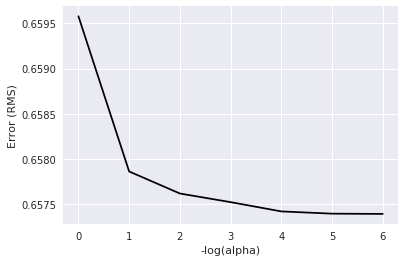

In [4]:
# plot curve of out-of-sample error versus alpha
x = range(len(rms_error))
plt.plot(x, rms_error, 'k')
plt.xlabel('-log(alpha)')
plt.ylabel('Error (RMS)')
plt.show()


In [5]:
# plot histogram of out of sample errors for best alpha value and scatter plot of actual versus predicted
# identify index corresponding to min value, retrain with the corresponding value of alpha
# use resulting model to predict against of out fample data
# plot errors (aka residuals)

index_best = rms_error.index(min(rms_error))
alph = alpha_list[index_best]
wine_ridge_model = linear_model.Ridge(alpha=alph)
wine_ridge_model.fit(x_train, y_train)
error_vector = y_test - wine_ridge_model.predict(x_test)


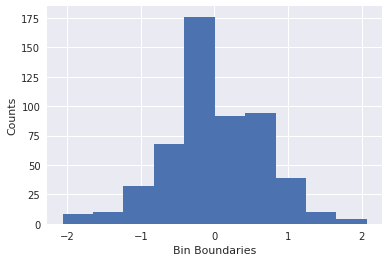

In [6]:
plt.hist(error_vector)
plt.xlabel('Bin Boundaries')
plt.ylabel('Counts')
plt.show()


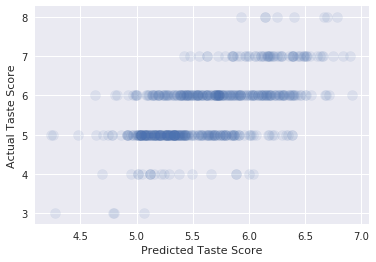

In [7]:
plt.scatter(wine_ridge_model.predict(x_test), y_test, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()
